# Recommendation System for Steam Games 

In [ ]:
# import google drive from google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# switching directory
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Steam Games/')

### importing the dataset

In [ ]:
import pandas as pd
steam = pd.read_csv('steam.csv')

In [ ]:
steam.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [ ]:
import matplotlib.pyplot as plt

### Null values Check

In [ ]:
for i in steam:print(i,'  ',steam[i].isnull().sum())

appid    0
name    0
release_date    0
english    0
developer    0
publisher    0
platforms    0
required_age    0
categories    0
genres    0
steamspy_tags    0
achievements    0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime    0
owners    0
price    0


# Visualization for steam games 

## Top rated Games on Steam

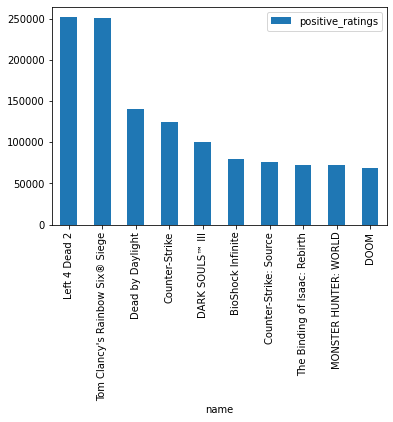

In [ ]:
import matplotlib.pyplot as plt
rating = pd.DataFrame(steam[steam['genres'] == 'Action'].sort_values(by='positive_ratings',ascending=False)[['name','positive_ratings']]).head(10)
rating.index = rating['name']
rating.drop('name',axis=1)
rating.plot(kind='bar')

In [40]:
import warnings
warnings.filterwarnings('ignore')

## Games with long playtimes

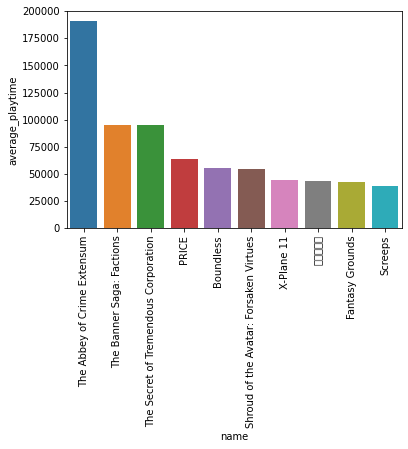

In [43]:
import seaborn as sns
rating = steam[['name','average_playtime']].sort_values(by='average_playtime',ascending=False).head(10)
rating.index = rating['name']
rating.drop('name',axis=1)
x = rating['name']
y = rating['average_playtime']
plotter = sns.barplot(x,y)
plotter.set_xticklabels(x,rotation=90)
plt.show()

## Games that dont have achievenments

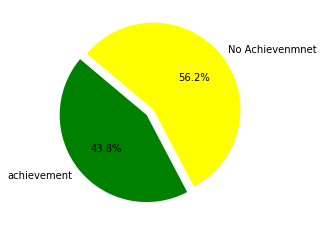

In [ ]:
achievenment = []
noachievenmnet = []
achieve = steam.achievements.apply(lambda x:x>0)
for i in range(len(achieve)):
  if achieve[i]==False:
   noachievenmnet.append(steam['name'][i])
  else:
    achievenment.append(steam['name'][i])

labels = 'achievement', 'No Achievenmnet'
sizes = [len(noachievenmnet),len(achievenment)]
colors = ['green', 'yellow']
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels,colors=colors,autopct='%1.1f%%',startangle=140)
plt.show()

## Non-English games in the steam

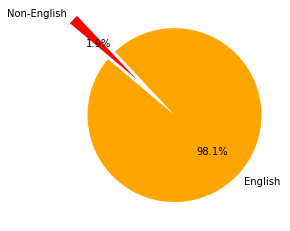

In [ ]:
englishgames = dict(steam.english.value_counts())
labels = 'English', 'Non-English'
sizes = [englishgames[1], englishgames[0]]
colors = ['orange', 'red']
explode = (0, 0.6)
plt.pie(sizes, explode=explode, labels=labels,colors=colors,autopct='%1.1f%%',startangle=140)
plt.show()

## Median price of different publishers in steam

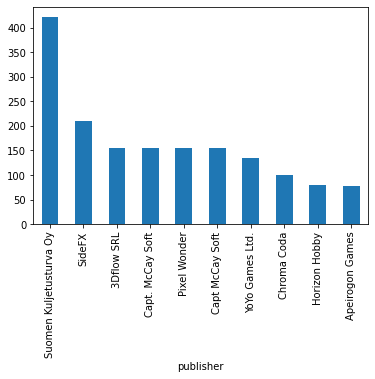

In [ ]:
steam.groupby('publisher')['price'].median().sort_values(ascending=False).head(10).plot(kind='bar')

In [ ]:
print("The total no of publishers on steam",len(steam['publisher'].unique()))

The total no of publishers on steam 14354


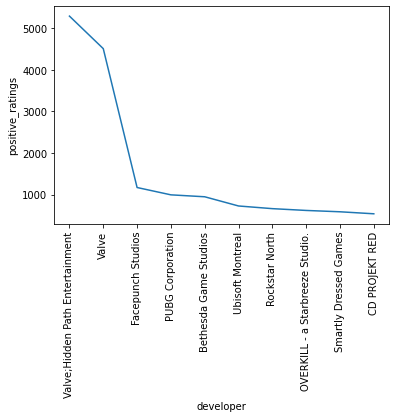

In [63]:
rating = pd.DataFrame(steam.groupby('developer')['positive_ratings'].sum().sort_values(ascending=False).head(10))
x = rating.index
y = rating.positive_ratings
dev = sns.lineplot(x,y,palette="red")
dev.set_xticklabels(labels=x, rotation =90)
dev.set_yticklabels(labels=range(0,6000,1000))
plt.show()

### Triming the dataset

In [ ]:
trim_steam  = steam.drop(['release_date','achievements','median_playtime','required_age','owners','price'],axis=1)
trim_steam['Main_Category']  = trim_steam.categories +';'+ trim_steam.steamspy_tags

In [ ]:
# Recommendation using Similarity Score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Using count vectorizier for 
conf_matrix = CountVectorizer()
con_mat = conf_matrix.fit_transform(trim_steam['steamspy_tags'])
con_mat.shape

(27075, 384)

In [ ]:
# Similarity matrix
cs = cosine_similarity(con_mat)

In [ ]:
Title = input("Enter the Title Name :- ")

Enter the Title Name :- Dota 2


In [ ]:
trim_steam['ROw_No'] = range(0,trim_steam.shape[0])

In [ ]:
Row_No = trim_steam[trim_steam.name == Title]['ROw_No'].values[0]

In [ ]:
result = list(enumerate(cs[Row_No]))
result = sorted(result,key = lambda x:x[1],reverse = True)
result = result[1:]

## Recomendation based on Similarity scores using cosine similaritiy

In [ ]:
print ('Top 10 recomendations for games Like',Title,':\n')
for recom in result[:10]:
  print(trim_steam[trim_steam.ROw_No == recom[0]]['name'].values[0])

Top 10 recomendations for games Like Dota 2 :

Prime World
Sanguo: War Under Heaven
Bloodline Champions
Empires Mod
Stronghold Kingdoms
Pox Nora
AirMech Strike
Dwarfs - F2P
The Banner Saga: Factions
King’s Bounty: Legions
